## Import the Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image

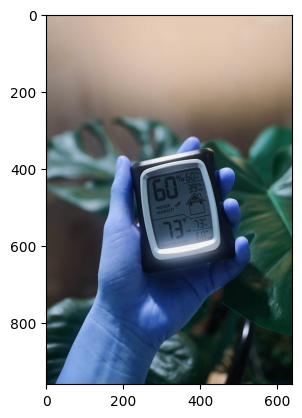

In [24]:
image = cv2.imread('meter.jpg')
plt.imshow(image)
plt.show()

## Convert into a grayscale image

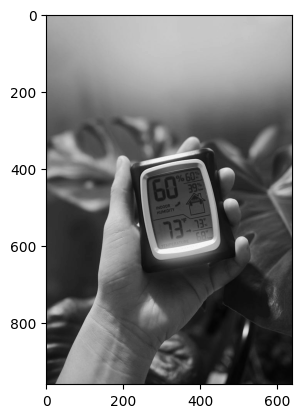

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

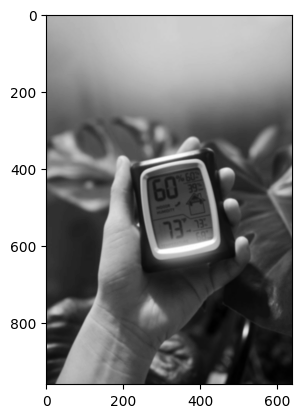

In [26]:
blurred = cv2.GaussianBlur(gray, (7,7), 0)
plt.imshow(blurred, cmap='gray')
plt.show()

# First we apply Global Thresholding

In [27]:
(T, thresh) = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)

In [19]:
cv2.imwrite('out.png', thresh)

True

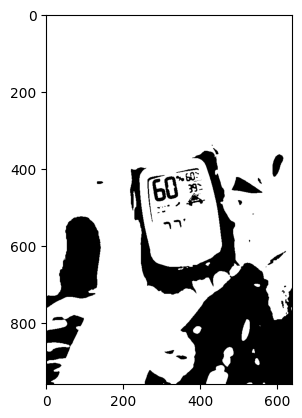

In [28]:
image = cv2.imread("out.png")

plt.imshow(image)
plt.show()

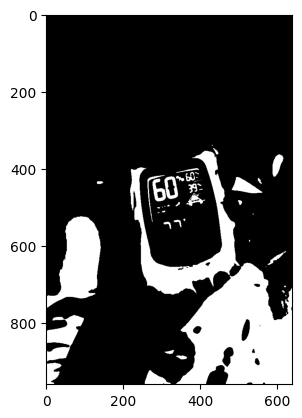

In [34]:
(T, thresh) = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()

## Otsu's Global Thresholding

In [35]:
(T, threshOtsu) = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)


In [39]:
T

112.0

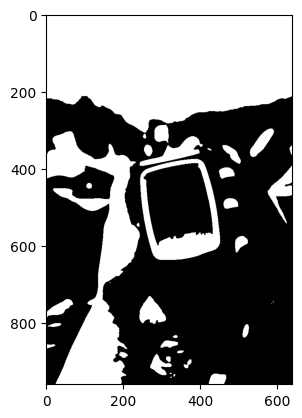

In [38]:
plt.imshow(threshOtsu, cmap='gray')
plt.show()

## **Adaptive Thresholding**

The adaptive thresholding method considers a small set of pixels and computes a threshold for each small region of the image.

### **Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)**

This method accepts the following parameters −
Parameters:

-> **source**: Input Image array(Single-channel, 8-bit or floating-point)

-> **maxVal**: Maximum value that can be assigned to a pixel.

-> **adaptiveMethod**: Adaptive method decides how threshold value is calculated.

-> **cv2.ADAPTIVE_THRESH_MEAN_C**: Threshold Value = (Mean of the neighbourhood area values – constant value).

In other words, it is the mean of the blockSize×blockSize neighborhood of a point minus constant.

-> **cv2.ADAPTIVE_THRESH_GAUSSIAN_C**: Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value).
In other words, it is a weighted sum of the blockSize×blockSize neighborhood of a point minus constant.

-> **thresholdType**: The type of thresholding to be applied.

-> **blockSize**: Size of a pixel neighborhood that is used to calculate a threshold value.

-> **constant**: A constant value that is subtracted from the mean or weighted sum of the neighbourhood pixels.



In [40]:
thresh = cv2.adaptiveThreshold(blurred, 255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 17, 3)
cv2.imwrite('adapt.jpg', thresh)

True

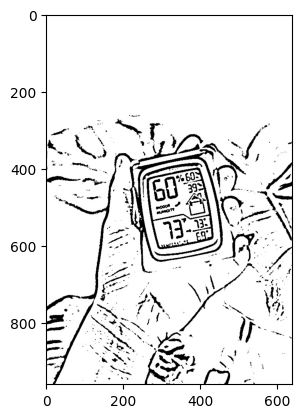

In [41]:
image = cv2.imread("adapt.jpg")
plt.imshow(image)
plt.show()

## Adaptive thresholding one the book page

In [42]:
# image is loaded
image1 = cv2.imread('page.jpg')

# convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying different thresholding techniques on the input image

# Adaptive mean
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
# Adaptive Gaussian
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

cv2.imwrite('adapt_mean.jpg', thresh1)
cv2.imwrite('adapt_Gaussian.jpg', thresh2)

True

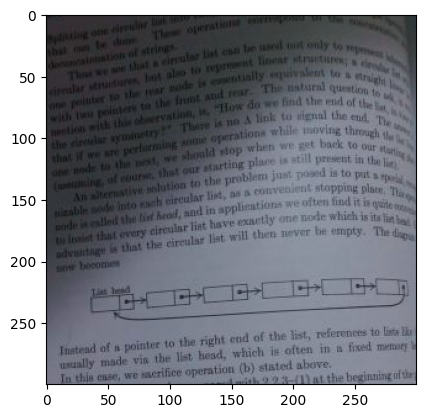

In [46]:
plt.imshow(image1)
plt.show()

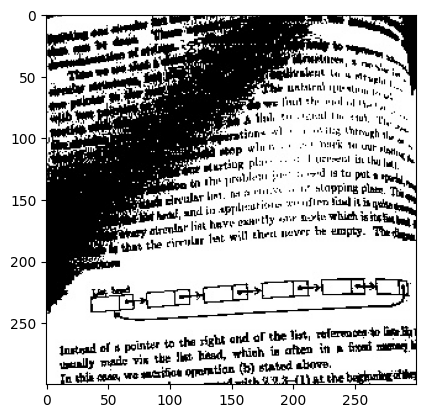

In [44]:
image = cv2.imread("adapt_mean.jpg")
plt.imshow(image)
plt.show()

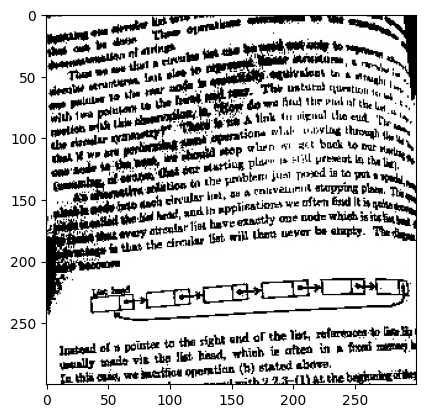

In [45]:
image = cv2.imread("adapt_Gaussian.jpg")
plt.imshow(image)
plt.show()

In [47]:
# image is loaded
image1 = cv2.imread('book_page.png')

# convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying different thresholding techniques on the input image

# Adaptive mean
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
# Adaptive Gaussian
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

cv2.imwrite('adapt_mean1.jpg', thresh1)
cv2.imwrite('adapt_Gaussian1.jpg', thresh2)

True

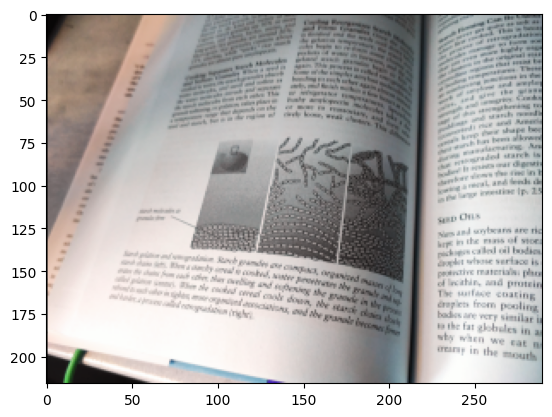

In [48]:
plt.imshow(image1)
plt.show()

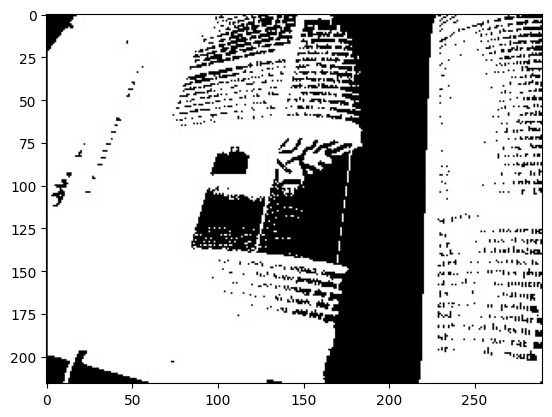

In [52]:
image = cv2.imread("adapt_mean1.jpg")
plt.imshow(image)
plt.show()

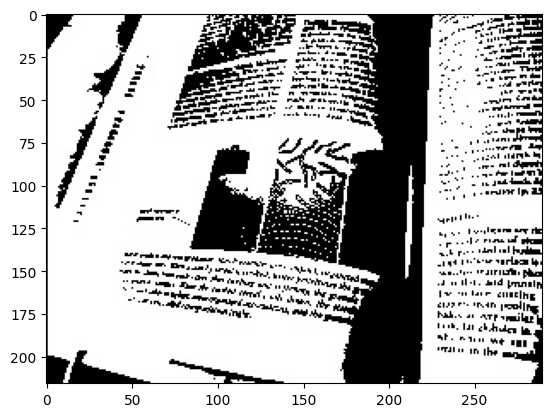

In [53]:
image = cv2.imread("adapt_Gaussian1.jpg")
plt.imshow(image)
plt.show()

## Sudoku

In [ ]:
# Converting to grayscale color space and applying median blur
img = cv2.imread("sudoku.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)

# Global thresholding
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

# Plotting the images using matplotlib
titles = ['Original', 'Global Thresholding',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# Specifying the grid size
plt.figure(figsize=(10,10))

# Number of images in the grid 2*2 = 4
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

# Displaying the grid
plt.show()